In [1]:
import pandas as pd
import numpy as np

import sys 
sys.path.append('..')

from src import sp_cleaning as cl
from src import sp_visualizations as vis

In [2]:
df= pd.read_csv('../data/data_processed/nulos_cat.csv')

In [3]:
df.sample()

,Category,City,Country,Customer_ID,Discount,Order_Date,Order_ID,Order_Priority,Product_ID,Product_Name,...,Sub_Category,Year,Market,Weeknum,Inflation(%),Exports_GDP(%),Imports_GDP(%),GDP_Growth(%),Month,Quarter
18255,Office Supplies,Novara,Italy,LE-168102,0.0,2013-05-04,ES-2013-3657887,Medium,OFF-AR-10001418,"BIC Markers, Easy-Erase",...,Art,2013,EU,18,1.219993,28.177442,25.856742,-2.949629,5,2


In [4]:
df.select_dtypes(include=np.number).columns

Index(['Discount', 'Profit', 'Quantity', 'Sales', 'Shipping_Cost', 'Year',
       'Weeknum', 'Inflation(%)', 'Exports_GDP(%)', 'Imports_GDP(%)',
       'GDP_Growth(%)', 'Month', 'Quarter'],
      dtype='object')

In [5]:
# No todas las columnas son útiles para hacer los estadísticos, elimino las que no son necesarias

columnas_num=df.select_dtypes(include=np.number).columns.tolist()
lista_eliminar = ['Weeknum', 'Year', 'Month', 'Quarter']
for col in lista_eliminar:
    columnas_num.remove(col)

In [6]:
df[columnas_num].describe().T

,count,mean,std,min,25%,50%,75%,max
Discount,51243.0,0.143039,0.212333,0.000000,0.000000,0.000000,0.200000,0.850000
Profit,51243.0,28.570698,174.378408,-6599.978000,0.000000,9.240000,36.737750,8399.976000
Quantity,51243.0,3.475870,2.278555,1.000000,2.000000,3.000000,5.000000,14.000000
Sales,51243.0,246.430283,487.549319,0.000000,31.000000,85.000000,251.000000,22638.000000
Shipping_Cost,51243.0,26.341665,57.131461,0.002000,2.610000,7.790000,24.440000,933.570000
Inflation(%),50050.0,4.101125,5.017209,-1.509245,1.622223,2.619524,5.403499,62.168650
Exports_GDP(%),50030.0,28.428897,17.602759,6.856453,14.617173,25.430861,31.355037,221.610060
Imports_GDP(%),50030.0,30.375397,16.874238,12.351892,18.194612,28.413271,32.635417,221.009959
GDP_Growth(%),51229.0,2.063350,2.723354,-49.127857,0.828926,1.688695,3.400792,91.781370


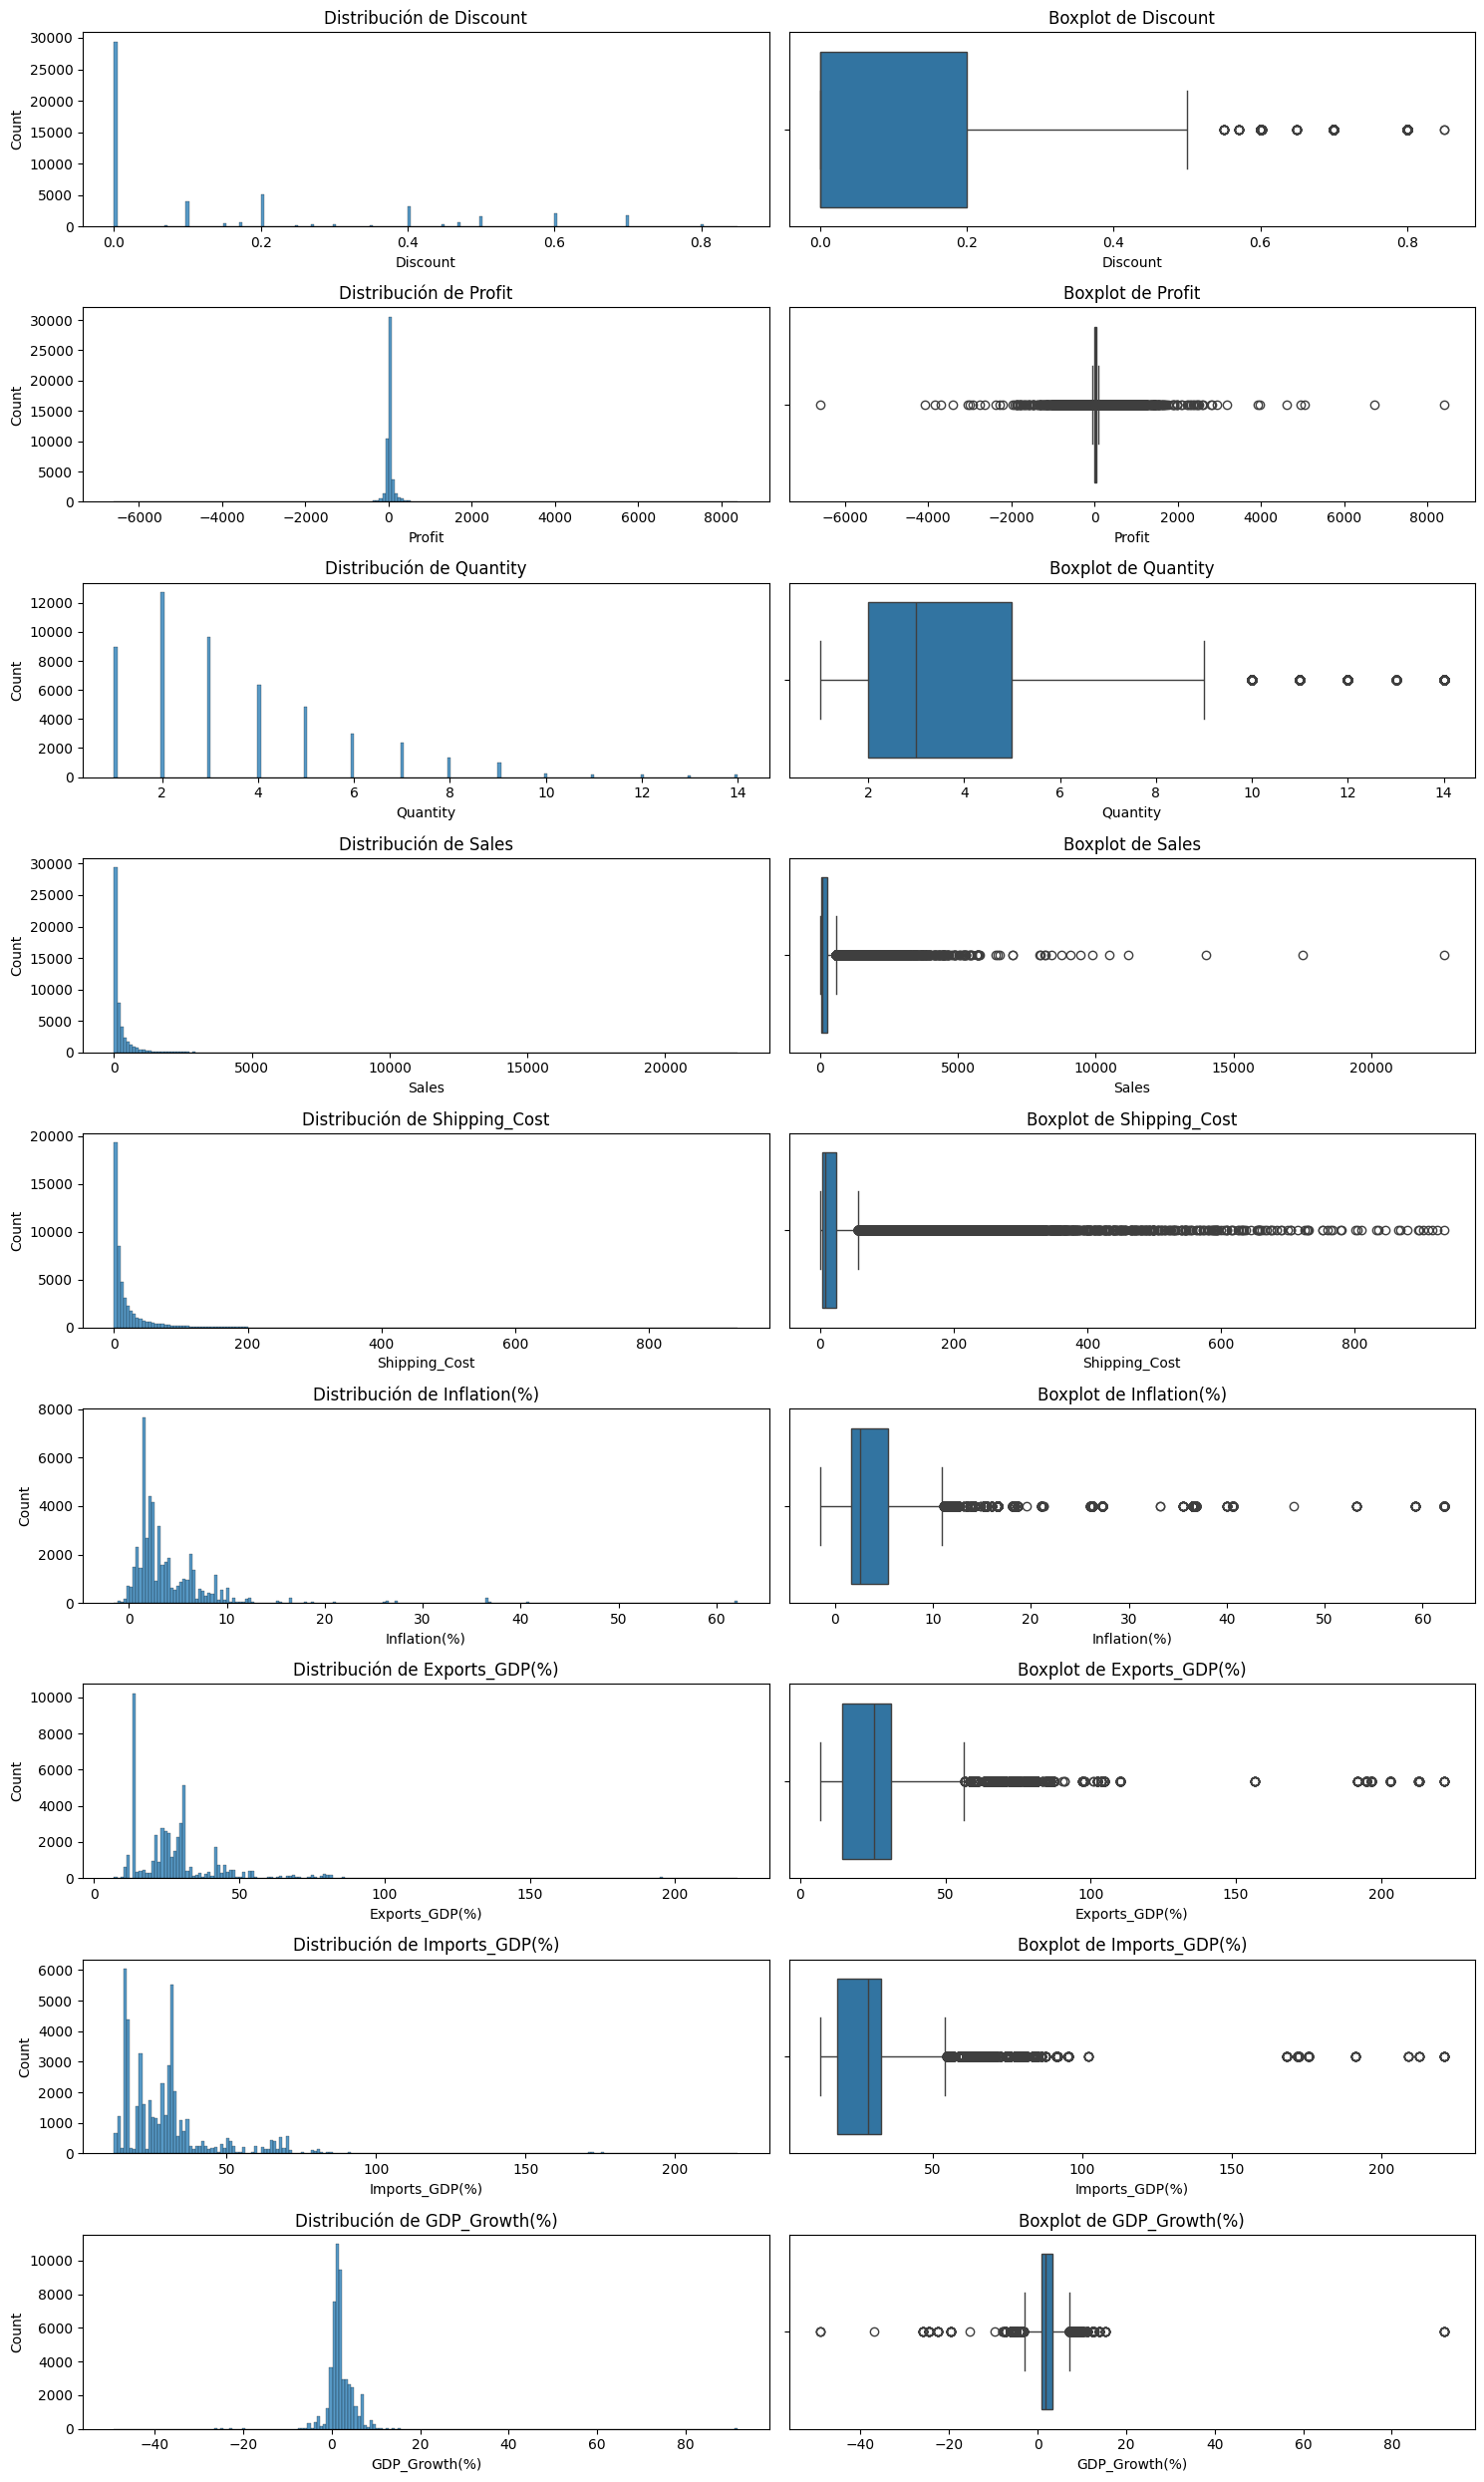

In [7]:
vis.subplot_col_num(df, columnas_num)

In [8]:
# Verifico el número de outliers que hay en cada caso
cl.contar_outliers(df)

Para la columna DISCOUNT tenemos 4172 outliers, lo que representa un 8.14% de los datos.
Para la columna PROFIT tenemos 9757 outliers, lo que representa un 19.04% de los datos.
Para la columna QUANTITY tenemos 876 outliers, lo que representa un 1.71% de los datos.
Para la columna SALES tenemos 5649 outliers, lo que representa un 11.02% de los datos.
Para la columna SHIPPING_COST tenemos 5901 outliers, lo que representa un 11.52% de los datos.
Para la columna YEAR tenemos 0 outliers, lo que representa un 0.0% de los datos.
Para la columna WEEKNUM tenemos 0 outliers, lo que representa un 0.0% de los datos.
Para la columna INFLATION(%) tenemos 1829 outliers, lo que representa un 3.57% de los datos.
Para la columna EXPORTS_GDP(%) tenemos 2372 outliers, lo que representa un 4.63% de los datos.
Para la columna IMPORTS_GDP(%) tenemos 4310 outliers, lo que representa un 8.41% de los datos.
Para la columna GDP_GROWTH(%) tenemos 2063 outliers, lo que representa un 4.03% de los datos.
Para la col

In [9]:
# Se ajustan los outliers. Los de los datos macroecónomicos se mantienen al ser valores representativos.

columnas_a_ajustar = ["Profit", "Quantity", "Sales", "Shipping_Cost", "Discount"]
cl.ajustar_outliers(df, columnas_a_ajustar)

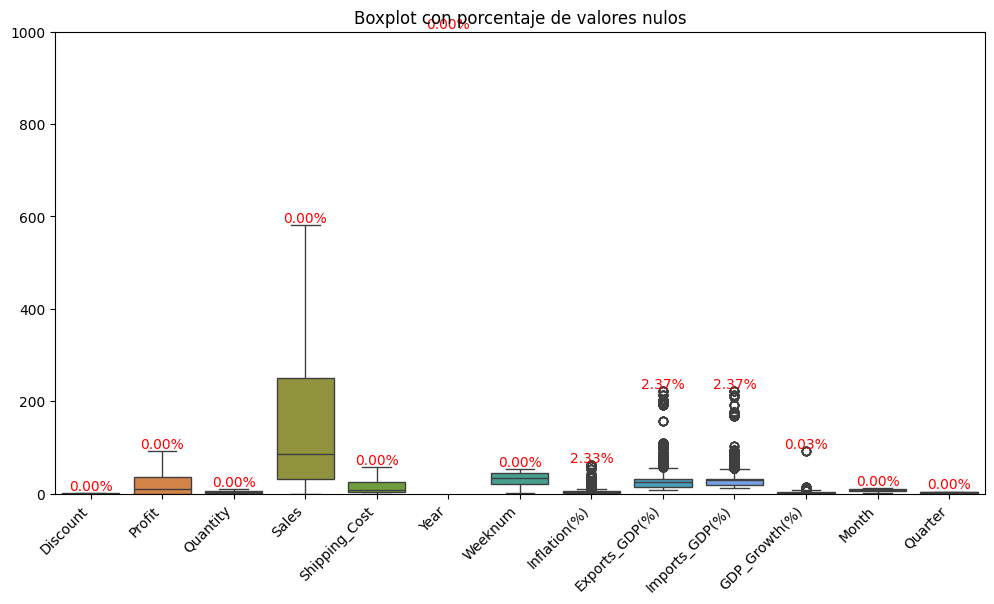

In [10]:
vis.boxplot_con_nulos(df)

In [11]:
# Analizamos las columnas numéricas relacionadas con fechas

lista_col_fecha=['Year', 'Month', 'Quarter', 'Weeknum']   
df[lista_col_fecha].describe().T

,count,mean,std,min,25%,50%,75%,max
Year,51243.0,2012.777433,1.098862,2011.0,2012.0,2013.0,2014.0,2014.0
Month,51243.0,7.521183,3.299853,1.0,5.0,8.0,10.0,12.0
Quarter,51243.0,2.792713,1.065881,1.0,2.0,3.0,4.0,4.0
Weeknum,51243.0,31.280604,14.428430,1.0,20.0,33.0,44.0,53.0


In [12]:
# Gestión de nulos de la columnas numéricas
high_umbral, low_umbral= cl.columnas_con_nulos(df, umbral=5) 

,Column,Datatype,NullCount,Null%
0,Inflation(%),float64,1193,2.328123
1,Exports_GDP(%),float64,1213,2.367153
2,Imports_GDP(%),float64,1213,2.367153
3,GDP_Growth(%),float64,14,0.027321


In [13]:
# Todas las columnas tienen un % de nulos inferior al umbral. Se imputarán con el método fillna()

df = df.fillna({
    'Inflation(%)': df['Inflation(%)'].median(),
    'Exports_GDP(%)': df['Exports_GDP(%)'].median(),
    'Imports_GDP(%)': df['Imports_GDP(%)'].median(),
    'GDP_Growth(%)': df['GDP_Growth(%)'].median()
})

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Discount,51243.0,0.130168,0.182679,0.000000,0.000000,0.000000,0.200000,0.500000
Profit,51243.0,18.056393,39.794148,-55.106625,0.000000,9.240000,36.737750,91.844375
Quantity,51243.0,3.438109,2.147745,1.000000,2.000000,3.000000,5.000000,9.500000
Sales,51243.0,172.283805,189.962837,0.000000,31.000000,85.000000,251.000000,581.000000
Shipping_Cost,51243.0,16.704983,18.967646,0.002000,2.610000,7.790000,24.440000,57.185000
Year,51243.0,2012.777433,1.098862,2011.000000,2012.000000,2013.000000,2014.000000,2014.000000
Weeknum,51243.0,31.280604,14.428430,1.000000,20.000000,33.000000,44.000000,53.000000
Inflation(%),51243.0,4.066632,4.963491,-1.509245,1.622223,2.619524,5.356048,62.168650
Exports_GDP(%),51243.0,28.357929,17.399136,6.856453,16.100577,25.430861,30.799365,221.610060
Imports_GDP(%),51243.0,30.328950,16.675987,12.351892,19.445009,28.413271,32.635417,221.009959


In [15]:
df.isnull().sum()

Category          0
City              0
Country           0
Customer_ID       0
Discount          0
Order_Date        0
Order_ID          0
Order_Priority    0
Product_ID        0
Product_Name      0
Profit            0
Quantity          0
Sales             0
Segment           0
Ship_Date         0
Ship_Mode         0
Shipping_Cost     0
State             0
Sub_Category      0
Year              0
Market            0
Weeknum           0
Inflation(%)      0
Exports_GDP(%)    0
Imports_GDP(%)    0
GDP_Growth(%)     0
Month             0
Quarter           0
dtype: int64

In [17]:
# Guardo el archivo 

df.to_csv('../data/data_processed/conjunto_datos_final.csv', index=False)  